## Importing Libraries

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


### Loading Model

In [21]:
model = tf.keras.models.load_model('trained_model.keras')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 conv2d_61 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 conv2d_62 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 conv2d_64 (Conv2D)          (None, 60, 60, 64)        36928     
                                                      

## Visualizing Single Image of test set

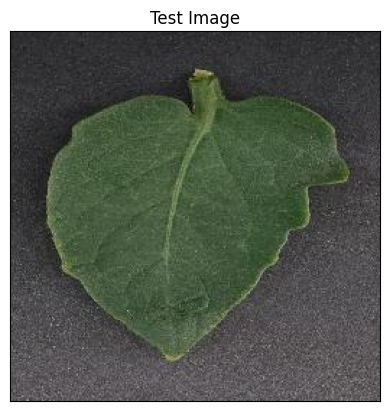

In [28]:
import cv2
image_path = 'test\TomatoHealthy2.JPG'
# reading image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converting BGR to RGB
# displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [29]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

(1, 128, 128, 3)


In [30]:
predictions = model.predict(input_arr)
print(predictions)

1/1 [==============================] - 1s 832ms/step
[[3.3789516e-09 2.5452383e-18 4.4838666e-10 9.4791460e-01 5.0889680e-13
  1.7554714e-07 1.3642986e-16 2.2342269e-14 6.2154686e-21 2.2476252e-15
  3.3335670e-08 1.6807941e-16 1.5710866e-19 7.2451517e-18 1.8964712e-14
  1.2561615e-07 1.5392697e-10 1.0767085e-11 1.0823584e-15 1.3391875e-12
  2.1438805e-23 6.4770277e-12 2.1107011e-10 6.5495651e-12 5.0703253e-10
  1.1082564e-07 8.5427496e-23 1.6129565e-21 9.1926099e-11 4.2629680e-03
  8.8866145e-06 2.2418876e-08 6.7800509e-12 4.6483408e-09 1.7699888e-11
  2.6693740e-05 5.2548663e-17 4.7786482e-02]]


In [31]:
result_index = np.argmax(predictions)
result_index

3

In [32]:
import os

# making a list of folders in the valid directory
classes = [f for f in os.listdir('valid') if os.path.isdir(os.path.join('valid', f))]
print(classes)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Apple___rust', 'Apple___scab', 'Blueberry___healthy', 'Cassava___bacterial_blight', 'Cassava___brown_streak_disease', 'Cassava___green_mottle', 'Cassava___healthy', 'Cassava___mosaic_disease', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry___healthy', 'Cherry___powdery_mildew', 'Chili___healthy', 'Chili___leaf curl', 'Chili___leaf spot', 'Chili___whitefly', 'Chili___yellowish', 'Coffee___cercospora_leaf_spot', 'Coffee___healthy', 'Coffee___red_spider_mite', 'Coffee___rust', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn___common_rust', 'Corn___gray_leaf_spot', 'Corn___healthy', 'Corn___northern_leaf_blight', 'Cucumber___diseased', 'Cucumber___healthy', 'Gauva___diseased', 'Gauva___healthy', 'Grape___black_measles', 'Grape___Black_rot', 'Grape___Es

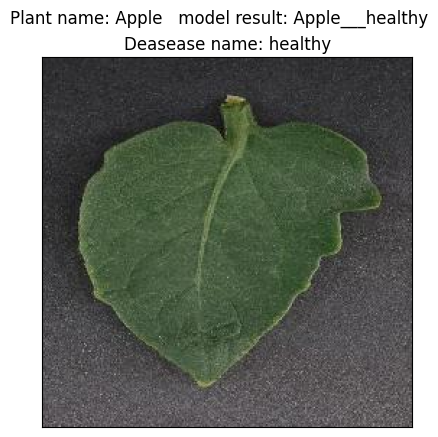

In [33]:
# displaying result
model_result = classes[result_index]
plant_name = ' '.join(model_result.split('_')[:-1])
deasease_name = ' '.join(model_result.split('___')[1].split('_'))
plt.imshow(img)
plt.suptitle(f'Plant name: {plant_name} model result: {model_result}')
plt.title(f'Deasease name: {deasease_name}')
plt.xticks([])
plt.yticks([])
plt.show()